# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

tensor([ 6,  6,  2,  1,  7,  2,  2,  6,  7,  6,  1,  0,  2,  7,
         5,  3,  3,  6,  4,  6,  1,  3,  8,  4,  6,  7,  7,  6,
         8,  8,  8,  0,  7,  5,  8,  9,  6,  1,  2,  7,  3,  6,
         9,  8,  9,  8,  9,  1,  7,  6,  3,  9,  7,  6,  6,  7,
         7,  4,  4,  4,  7,  3,  0,  3])
Shirt


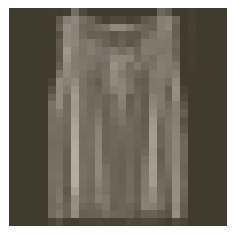

In [18]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);
print(label)
print(labels_map[label[0].item()])


With the data loaded, it's time to import the necessary packages.

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper


from collections import OrderedDict


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [108]:
# TODO: Define your network architecture here

# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64,64,64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu3', nn.ReLU()),
                      ('fc4', nn.Linear(hidden_sizes[2], hidden_sizes[3])),
                      ('relu4', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[3], output_size))]))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [109]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)

In [110]:
# TODO: Train the network here

epochs = 10
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):   #MNIST data is 60K test and 10K test. 64 (batch)*938 step~60K, since it shuffle should not be covering everythong probably
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()  #loss is scalar tensor, to get it summ with running loss need to get loss.item()
        
        if steps % print_every == 0:
            print("Epoch:{} {}/{}... ".format(steps,e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch:40 1/10...  Loss: 2.2984
Epoch:80 1/10...  Loss: 2.2201
Epoch:120 1/10...  Loss: 1.7686
Epoch:160 1/10...  Loss: 1.1670
Epoch:200 1/10...  Loss: 0.9641
Epoch:240 1/10...  Loss: 0.7966
Epoch:280 1/10...  Loss: 0.7472
Epoch:320 1/10...  Loss: 0.7344
Epoch:360 1/10...  Loss: 0.6918
Epoch:400 1/10...  Loss: 0.6995
Epoch:440 1/10...  Loss: 0.6405
Epoch:480 1/10...  Loss: 0.6192
Epoch:520 1/10...  Loss: 0.6253
Epoch:560 1/10...  Loss: 0.5658
Epoch:600 1/10...  Loss: 0.5386
Epoch:640 1/10...  Loss: 0.5171
Epoch:680 1/10...  Loss: 0.5350
Epoch:720 1/10...  Loss: 0.4942
Epoch:760 1/10...  Loss: 0.5281
Epoch:800 1/10...  Loss: 0.5049
Epoch:840 1/10...  Loss: 0.4826
Epoch:880 1/10...  Loss: 0.4639
Epoch:920 1/10...  Loss: 0.4640
Epoch:960 2/10...  Loss: 0.2777
Epoch:1000 2/10...  Loss: 0.5324
Epoch:1040 2/10...  Loss: 0.4501
Epoch:1080 2/10...  Loss: 0.4242
Epoch:1120 2/10...  Loss: 0.4041
Epoch:1160 2/10...  Loss: 0.4747
Epoch:1200 2/10...  Loss: 0.4669
Epoch:1240 2/10...  Loss: 0.4343
Epo

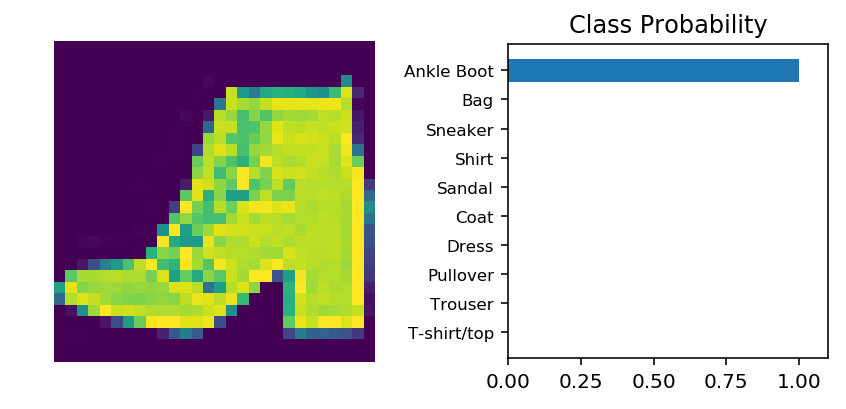

In [138]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.

In [114]:
correct = 0
total = 0
#ps = F.softmax(logits, dim=1)
with torch.no_grad():
    for data in trainloader:
        img, label_ = data

        img = img.resize_(64, 784)   #64 image at a time,.

        outputs = model.forward(img)
        _, predicted = torch.max(outputs, 1)
        #predicted = F.softmax(outputs, dim=1)

        #print('label',label_)
        #print(outputs)
        #print('predicted',predicted)
        #print(labels.size(0))
       
        if (total<=50000):    #have to put this since last iterations there are prediction but not labels
            total += label_.size(0)   #add total=64+64+..
            #print(label_.size())
            #print(predicted.size())

            correct += (predicted == label_).sum().item()

print('Accuracy of the network on the 10000 train images: %d %%' % (
    100 * correct / total))     #loss below 0.4 by increasing epoch from 3 to 10, adding two more layer hidden unit increase from 81 to 86%
                                # adding momentum 0.9 siginificantly improve convergence rate increase accuracy from 86% to 89% after 2-3 epoch

Accuracy of the network on the 10000 train images: 89 %


In [106]:
correct = 0
total = 0
#ps = F.softmax(logits, dim=1)
with torch.no_grad():
    for data in testloader:
        img, label_ = data

        img = img.resize_(64, 784)   #64 image at a time,.

        outputs = model.forward(img)
        _, predicted = torch.max(outputs, 1)
        #predicted = F.softmax(outputs, dim=1)

        #print('label',label_)
        #print(outputs)
        #print('predicted',predicted)
        #print(labels.size(0))
       
        if (total<=9000):    #have to put this since last iterations there are prediction but not labels
            total += label_.size(0)   #add total=64+64+..
            #print(label_.size())
            #print(predicted.size())

            correct += (predicted == label_).sum().item()

print('Accuracy of the network on the 10000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 train images: 84 %


# changing the optimizer to ADA#

In [115]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, amsgrad=False)


In [116]:

# TODO: Train the network here

epochs = 10
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):   #MNIST data is 60K test and 10K test. 64 (batch)*938 step~60K, since it shuffle should not be covering everythong probably
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer2.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer2.step()
        
        running_loss += loss.item()  #loss is scalar tensor, to get it summ with running loss need to get loss.item()
        
        if steps % print_every == 0:
            print("Epoch:{} {}/{}... ".format(steps,e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch:40 1/10...  Loss: 0.3388
Epoch:80 1/10...  Loss: 0.2869
Epoch:120 1/10...  Loss: 0.2714
Epoch:160 1/10...  Loss: 0.2855
Epoch:200 1/10...  Loss: 0.2815
Epoch:240 1/10...  Loss: 0.2695
Epoch:280 1/10...  Loss: 0.2780
Epoch:320 1/10...  Loss: 0.3057
Epoch:360 1/10...  Loss: 0.3179
Epoch:400 1/10...  Loss: 0.2952
Epoch:440 1/10...  Loss: 0.3076
Epoch:480 1/10...  Loss: 0.3064
Epoch:520 1/10...  Loss: 0.3041
Epoch:560 1/10...  Loss: 0.3234
Epoch:600 1/10...  Loss: 0.3050
Epoch:640 1/10...  Loss: 0.2679
Epoch:680 1/10...  Loss: 0.2947
Epoch:720 1/10...  Loss: 0.2936
Epoch:760 1/10...  Loss: 0.2742
Epoch:800 1/10...  Loss: 0.2864
Epoch:840 1/10...  Loss: 0.3070
Epoch:880 1/10...  Loss: 0.2811
Epoch:920 1/10...  Loss: 0.2779
Epoch:960 2/10...  Loss: 0.1497
Epoch:1000 2/10...  Loss: 0.2755
Epoch:1040 2/10...  Loss: 0.2883
Epoch:1080 2/10...  Loss: 0.2932
Epoch:1120 2/10...  Loss: 0.2727
Epoch:1160 2/10...  Loss: 0.2860
Epoch:1200 2/10...  Loss: 0.2689
Epoch:1240 2/10...  Loss: 0.2959
Epo

In [117]:
correct = 0
total = 0
#ps = F.softmax(logits, dim=1)
with torch.no_grad():
    for data in trainloader:
        img, label_ = data

        img = img.resize_(64, 784)   #64 image at a time,.

        outputs = model.forward(img)
        _, predicted = torch.max(outputs, 1)
        #predicted = F.softmax(outputs, dim=1)

        #print('label',label_)
        #print(outputs)
        #print('predicted',predicted)
        #print(labels.size(0))
       
        if (total<=50000):    #have to put this since last iterations there are prediction but not labels
            total += label_.size(0)   #add total=64+64+..
            #print(label_.size())
            #print(predicted.size())

            correct += (predicted == label_).sum().item()

print('Accuracy of the network on the 10000 train images: %d %%' % (
    100 * correct / total))     #loss below 0.4 by increasing epoch from 3 to 10, adding two more layer hidden unit increase from 81 to 86%
#switching to ADAM increased from SGD 89% to 92%

Accuracy of the network on the 10000 train images: 92 %
